## Importing Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [65]:
# Link: https://www.kaggle.com/datasets/ealaxi/paysim1
df = pd.read_csv("Fraud.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Feature Description

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that 
                 start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start 
                 with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the 
          fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the 
          funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. 
                 An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [67]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [68]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [69]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Finding NULL/Missing Values

In [70]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

It appears that the provided dataset has no NULL or Missing Values.

**Insights**

There are no null values and duplicate rows - no imputation necessary.<br><br>
There are over 6 million transaction details.<br><br>
There are 11 variables.<br><br>
There are instances where there is a 'TRANSFER' followed by 'CASH_OUT', both for the same amount, and both transactions are<br><br> flagged as fraud (observed in the first 5 rows and last 5 rows).<br><br>
From the first 5 rows and last 5 rows, all transactions with newbalanceOrig = 0 are Fraudulent transactions.<br><br>
From the last 5 rows, no transactions that were "TRANSFER" with amount > 200,000 currency units were Flagged as Fraud.<br><br>
The flagging system may not be effective.

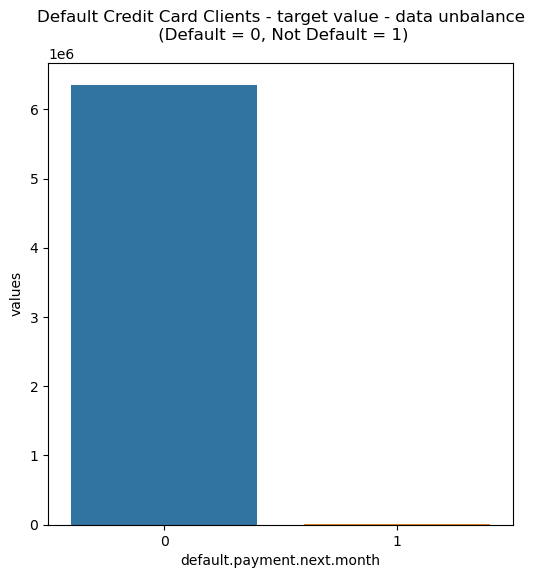

In [71]:
temp = df["isFraud"].value_counts()
df_1 = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df_1)
locs, labels = plt.xticks()
plt.show()

In [73]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [39]:
# From the Feature Description we can say that the features 'nameOrig' and 'nameDest' are irrelevant

df = df.drop(['nameOrig','nameDest'], axis=1)

In [40]:
# Finding Features with categorical values

df.nunique()

step                  743
type                    5
amount            5316900
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

The feature 'type' is a categorical variable.<br>
Lets find more information about that feature.

In [41]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

## EDA

Diagramatic representation of distribution of type.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='type'>

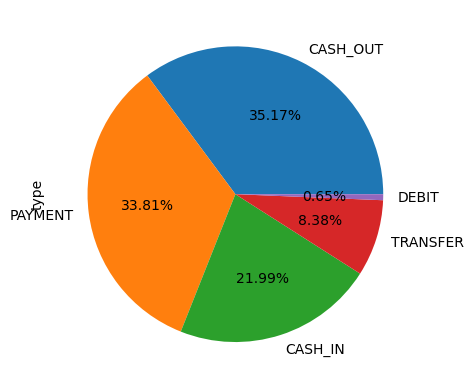

In [43]:
df["type"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: xlabel='isFraud', ylabel='count'>

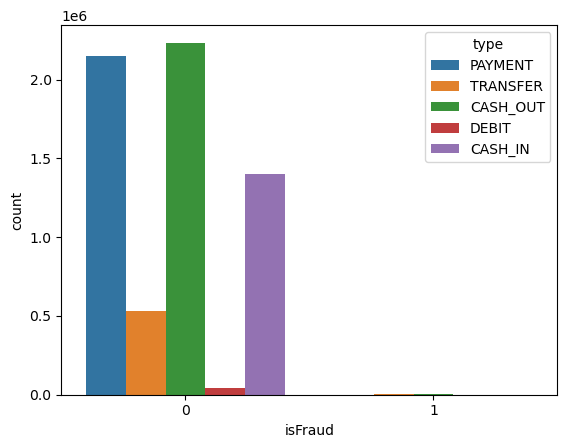

In [44]:
sns.countplot(data=df, x="isFraud", hue="type")

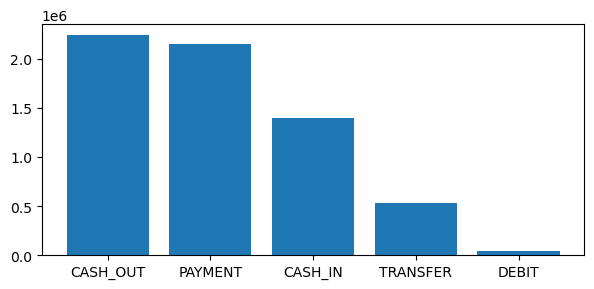

In [45]:
plt.figure(figsize=(7,3))
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values)
plt.show()

In [46]:
# Creating a copy of dataset to add changes to
data_ml = df.copy() 

In [47]:
# Creating subsets of fraud and valid transactions
valid = data_ml[data_ml['isFraud'] == 0]
fraud = data_ml[data_ml['isFraud'] == 1]

### Visualize Valid and Fraud transactions over time

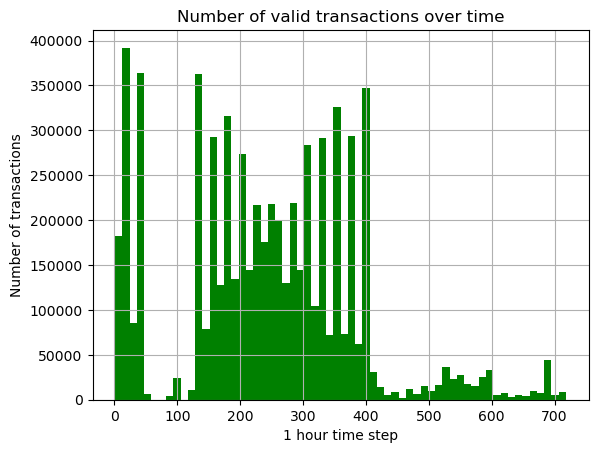

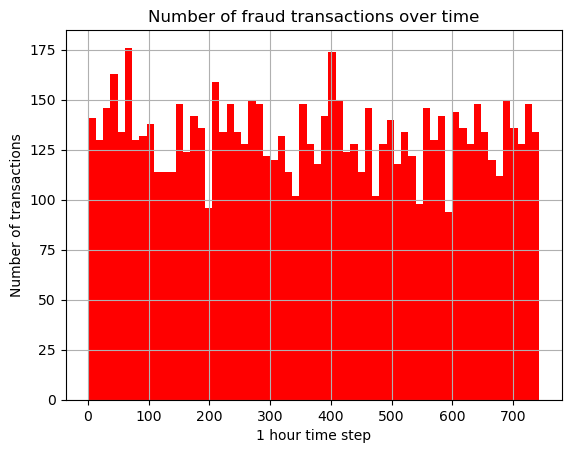

In [48]:
bins = 62 #each bin correspond to 12 steps/hours

valid.hist(column = "step", color="green", bins = bins)
plt.xlabel("1 hour time step")
plt.ylabel("Number of transactions")
plt.title("Number of valid transactions over time")

fraud.hist(column = "step", color="red", bins = bins)
plt.xlabel("1 hour time step")
plt.ylabel("Number of transactions")
plt.title("Number of fraud transactions over time")

plt.show()

**Insights**

1. Valid transactions do not occur consistently over time. There are spikes throughout certain periods. A significant porportion of transactions occur during timesteps 0-48 and 120-408. Within these timesteps, the transaction volume also alternate between high and low per 12 hour bins.<br><br>
2. Fraud transactions occur uniformly over time with little variation.


### Finding when the fraud transactions occur

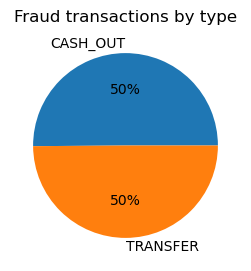

In [49]:
fraud_type = fraud['type'].value_counts()
fraud_transaction = fraud_type.index
fraud_count = fraud_type.values

plt.figure(figsize=(4,3))
plt.pie(fraud_count, labels= fraud_transaction, autopct='%1.0f%%')
plt.title("Fraud transactions by type")
plt.show()

There are 5 types of transactions found in valid transactions. Most common transaction type is CASH_OUT, followed by PAYMENT, CASH_IN, TRANSFER and DEBIT. <br>
Fraud transactions ONLY occur with CASH_OUT and TRANSFER equally at 50% each.


In [50]:
# Finding balance error at both ends Origin and Destination

wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"])

print("Percentage of transactions with balance errors in initiating account: {}%".format(100*round(wrong_orig_bal/len(df),2)))
print("Percentage of transactions with balance errors in the recipient account: {}%".format(100*round(wrong_dest_bal/len(df),2)))

Percentage of transactions with balance errors in initiating account: 85.0%
Percentage of transactions with balance errors in the recipient account: 74.0%


**85%** of transactions have balance errors in **intiating account** while **74%** of transactions have balance errors in **recipient account**.

## Modelling

In [51]:
from sklearn.preprocessing import LabelEncoder

def ENCODER(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [52]:
df["type"] = ENCODER(df["type"])

type ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']


In [53]:
df.drop("isFlaggedFraud", axis=1, inplace=True)

In [54]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [55]:
features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [56]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [59]:
from sklearn.tree import DecisionTreeClassifier

CLASSIFIER = DecisionTreeClassifier()
CLASSIFIER.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = CLASSIFIER.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9997013808776888